In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import requests
import numpy as np
import seaborn as sns
import plotly.express as px


In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

In [4]:
df = requests.get(url).json()
datos = pd.json_normalize(df)

In [5]:
datos.sample(5)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
3041,4231-LZUYM,No,Female,0,Yes,No,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.65,1887
7127,9805-FILKB,No,Male,0,Yes,Yes,46,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),20.20,845.6
6930,9547-ITEFG,No,Male,0,Yes,Yes,9,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),102.60,897.75
1487,2137-DQMEV,No,Male,0,Yes,Yes,68,No,No phone service,DSL,...,Yes,No,No,Yes,No,One year,No,Mailed check,44.80,2983.65
2920,4060-LDNLU,No,Male,0,No,No,7,Yes,Yes,Fiber optic,...,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,96.20,639.7


In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [7]:
datos['account.Charges.Total']=datos['account.Charges.Total'].astype(str)
datos['account.Charges.Total']=datos['account.Charges.Total'].replace(' ',np.nan)

In [8]:
datos.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [9]:
datos=datos.dropna()

In [10]:
datos['account.Charges.Total'].isnull().sum()

np.int64(0)

In [11]:
datos['account.Charges.Total']=datos['account.Charges.Total'].astype(np.float64)
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7256 non-null   object 
 1   Churn                      7256 non-null   object 
 2   customer.gender            7256 non-null   object 
 3   customer.SeniorCitizen     7256 non-null   int64  
 4   customer.Partner           7256 non-null   object 
 5   customer.Dependents        7256 non-null   object 
 6   customer.tenure            7256 non-null   int64  
 7   phone.PhoneService         7256 non-null   object 
 8   phone.MultipleLines        7256 non-null   object 
 9   internet.InternetService   7256 non-null   object 
 10  internet.OnlineSecurity    7256 non-null   object 
 11  internet.OnlineBackup      7256 non-null   object 
 12  internet.DeviceProtection  7256 non-null   object 
 13  internet.TechSupport       7256 non-null   object 
 1

In [12]:
datos.sample(5)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
706,1015-JPFYW,No,Male,0,No,Yes,7,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.45,136.75
522,0742-LAFQK,No,Male,0,Yes,No,72,Yes,Yes,Fiber optic,...,Yes,Yes,No,No,Yes,Two year,Yes,Electronic check,99.15,7422.10
3286,4581-SSPWD,Yes,Female,0,No,No,3,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.80,246.30
3051,4248-QPAVC,Yes,Female,1,Yes,No,17,Yes,Yes,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),85.35,1463.45
3848,5271-DBYSJ,No,Male,1,No,No,11,Yes,No,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),79.15,827.70


In [13]:
column_str=['Churn','customer.gender','customer.Partner','customer.Dependents','phone.PhoneService','phone.MultipleLines','internet.InternetService',
            'internet.OnlineBackup','internet.DeviceProtection','internet.TechSupport','internet.StreamingTV','internet.StreamingMovies','account.Contract',
            'account.PaperlessBilling','account.PaymentMethod']
for i in column_str:
  datos[i]=datos[i].str.lower()
datos.sample(5)



,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
54,0093-XWZFY,yes,male,0,no,no,40,yes,yes,fiber optic,...,yes,yes,no,yes,yes,month-to-month,yes,credit card (automatic),104.50,4036.85
1844,2625-TRCZQ,no,female,0,yes,no,51,no,no phone service,dsl,...,yes,no,no,yes,yes,month-to-month,yes,electronic check,49.65,2553.35
3047,4237-RLAQD,yes,male,0,no,no,1,yes,no,dsl,...,no,no,no,no,no,month-to-month,yes,mailed check,45.85,45.85
2801,3884-UEBXB,no,female,0,yes,yes,67,no,no phone service,dsl,...,yes,no,no,no,no,two year,no,bank transfer (automatic),36.15,2434.45
6681,9189-JWSHV,yes,female,1,yes,no,24,yes,yes,fiber optic,...,no,no,no,yes,yes,month-to-month,yes,electronic check,93.55,2264.05


In [14]:
col_bin=['Churn','customer.Partner','customer.Dependents','phone.PhoneService','account.PaperlessBilling']

for i in col_bin:
  print(f'La columna {i} tiene estos datos: {datos[i].unique()}')

La columna Churn tiene estos datos: ['no' 'yes' '']
La columna customer.Partner tiene estos datos: ['yes' 'no']
La columna customer.Dependents tiene estos datos: ['yes' 'no']
La columna phone.PhoneService tiene estos datos: ['yes' 'no']
La columna account.PaperlessBilling tiene estos datos: ['yes' 'no']


In [15]:
datos['Churn']=datos['Churn'].replace('',np.nan)
datos['Churn'].unique()

array(['no', 'yes', nan], dtype=object)

In [16]:
datos['Churn']=datos['Churn'].replace({'yes':'1','no':'0'})
datos['Churn'].unique()

array(['0', '1', nan], dtype=object)

In [17]:
col_bin=['customer.Partner','customer.Dependents','phone.PhoneService','account.PaperlessBilling']
for col in col_bin:
  datos[col]=datos[col].replace({'yes':'1','no':'0'})
  datos[col]=datos[col].astype(np.int64)

for col in col_bin:
  print(f'{col}:{datos[col].unique()}')

customer.Partner:[1 0]
customer.Dependents:[1 0]
phone.PhoneService:[1 0]
account.PaperlessBilling:[1 0]


In [18]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7256 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7256 non-null   object 
 3   customer.SeniorCitizen     7256 non-null   int64  
 4   customer.Partner           7256 non-null   int64  
 5   customer.Dependents        7256 non-null   int64  
 6   customer.tenure            7256 non-null   int64  
 7   phone.PhoneService         7256 non-null   int64  
 8   phone.MultipleLines        7256 non-null   object 
 9   internet.InternetService   7256 non-null   object 
 10  internet.OnlineSecurity    7256 non-null   object 
 11  internet.OnlineBackup      7256 non-null   object 
 12  internet.DeviceProtection  7256 non-null   object 
 13  internet.TechSupport       7256 non-null   object 
 1

In [19]:
datos.isnull().sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [20]:
datos['cuentas_diarias']=round(datos['account.Charges.Monthly']/30,2)
datos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuentas_diarias
0,0002-ORFBO,0,female,0,1,1,9,1,no,dsl,...,no,yes,yes,no,one year,1,mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,male,0,0,0,9,1,yes,dsl,...,no,no,no,yes,month-to-month,0,mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,male,0,0,0,4,1,no,fiber optic,...,yes,no,no,no,month-to-month,1,electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,male,1,1,0,13,1,no,fiber optic,...,yes,no,yes,yes,month-to-month,1,electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,female,1,1,0,3,1,no,fiber optic,...,no,yes,yes,no,month-to-month,1,mailed check,83.9,267.40,2.80


In [21]:
datos.describe()

,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,cuentas_diarias
count,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.1629,0.483600,0.299063,32.395535,0.902839,0.593716,64.755423,2280.634213,2.158467
std,0.3693,0.499765,0.457879,24.558067,0.296197,0.491173,30.125739,2268.632997,1.004282
min,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,35.450000,400.225000,1.180000
50%,0.0000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.340000
75%,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,89.900000,3785.300000,3.000000
max,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


In [22]:
datos_resp=datos.copy()

In [23]:
df_churn=datos['Churn'].value_counts()

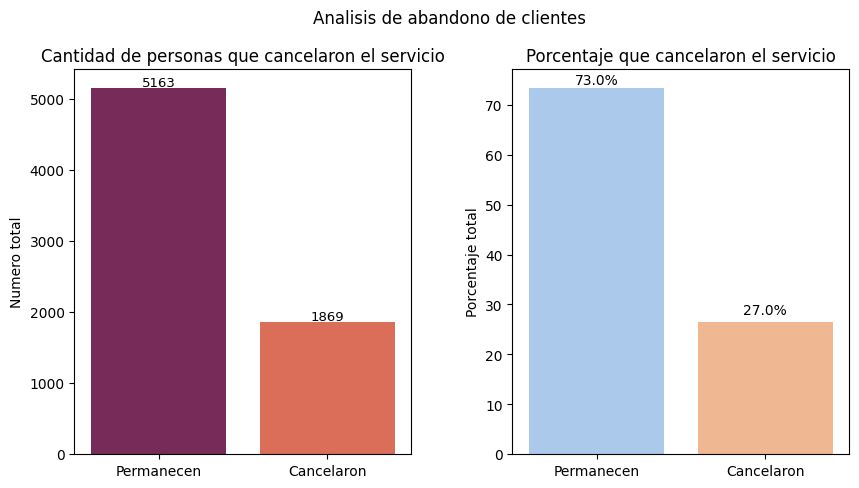

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Analisis de abandono de clientes', y=1, fontsize=12)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
def graficar_churn_numeros(datos, ax, titulo):
    sns.barplot(x=datos.index, y=datos.values, hue=df_churn.index, ax=ax, palette='rocket')
    ax.set_title(titulo)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Permanecen', 'Cancelaron'])
    ax.set_ylabel('Numero total')
    ax.set_xlabel('')
    for i, j in enumerate(df_churn.values):
        ax.text(i, j + 20, str(j), color='black', fontsize=9.5, ha='center')
def graficar_churn_porcentajes(datos, ax, titulo):
    sns.barplot(x=datos.index, y=((datos.values) / (datos.values.sum()) * 100), hue=datos.index, ax=ax, palette='pastel')
    ax.set_title(titulo)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Permanecen', 'Cancelaron'])
    ax.set_ylabel('Porcentaje total')
    ax.set_xlabel('')
    for i, j in enumerate(((datos.values) / (datos.values.sum()) * 100).round(0)):
        ax.text(i, j + 1, f'{j}%', color='black', fontsize=10, ha='center')
graficar_churn_numeros(df_churn, ax[0], 'Cantidad de personas que cancelaron el servicio')
graficar_churn_porcentajes(df_churn, ax[1], 'Porcentaje que cancelaron el servicio')
plt.show()


In [25]:
datos_resp.rename(columns={'Churn':'Baja','customer.gender':'Genero','internet.InternetService':'servicio_internet',
                           'account.Contract':'tipo_de_contrato','account.PaymentMethod':'forma_pago'},inplace=True)
datos_resp.columns


Index(['customerID', 'Baja', 'Genero', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'servicio_internet',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'tipo_de_contrato',
       'account.PaperlessBilling', 'forma_pago', 'account.Charges.Monthly',
       'account.Charges.Total', 'cuentas_diarias'],
      dtype='object')

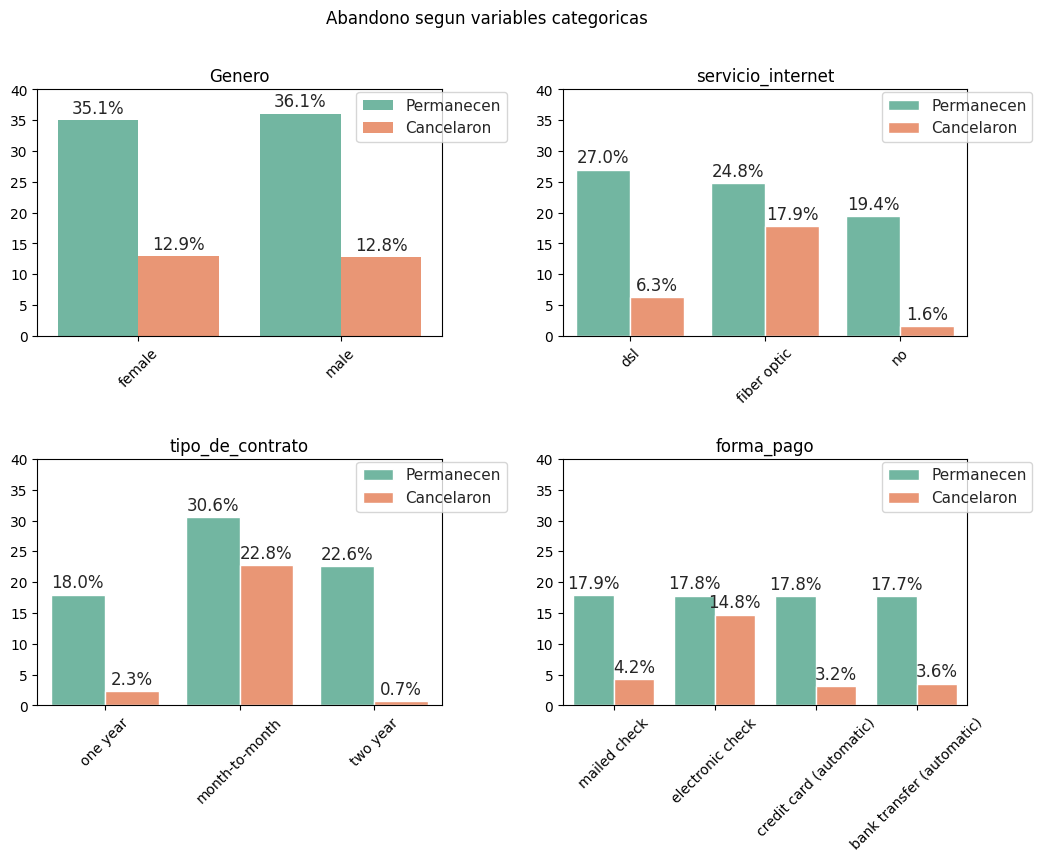

In [26]:
analisis=['Genero','servicio_internet','tipo_de_contrato','forma_pago']

fig, axs=plt.subplots(2,2, figsize=(12,8))
fig.subplots_adjust(hspace=0.5,wspace=0.3)
fig.suptitle('Abandono segun variables categoricas')
axs=axs.flatten()
for i, var in enumerate(analisis):
  ax=axs[i]
  ax=sns.countplot(data=datos_resp,x=var,hue='Baja',stat='percent',ax=ax,palette='Set2')
  custom_params = {"axes.spines.right": False, "axes.spines.top": False}
  sns.set_theme(style="ticks", rc=custom_params)
  ax.set_title(f'{var}')
  ax.set_ylabel('')
  ax.set_xlabel('')
  ax.set_ylim(0,40)
  ax.tick_params(axis='x',rotation=45)
  ax.legend(['Permanecen','Cancelaron'],bbox_to_anchor=(1.18,1.02))

  for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=2)

plt.show()

In [27]:
datos_resp.rename(columns={'account.Charges.Total':'gasto_total','account.Charges.Monthly':'gasto_mensual'},inplace=True)
col_numericas=['gasto_total','gasto_mensual']
for i in col_numericas:
  fig= px.box(datos_resp,x='Baja',y=datos_resp[i],points='all',color='Baja',notched=True)

  fig.update_layout(width=800,height=450,title=dict(text=f'Analisis de bajas por {i} total de clientes',x=0.5,xanchor='center'),
                    xaxis_title='',yaxis_title='Total',
                    font_family='Arial',font_size=20,font_color='black',
                    xaxis=dict(tickvals = [0, 1],ticktext=['Permanecen','Baja']),showlegend=False)

  fig.show()